# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [1]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
import os
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
print("PUIdata", os.getenv("PUIDATA"))

from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

PUIdata /nfshome/ty1045/PUIdata
Populating the interactive namespace from numpy and matplotlib


# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [3]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [5]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [6]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

# SPLIT BY CATEGORY

as an example I am splitting data by gender and looking at age or riders:

**H0: there is no statistical difference in the age distribution of male and female riders**
$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [7]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [8]:
#dropping some data I no longer need
#... your code here...
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,ageM,ageF
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,NaN,55.0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00,52.0,NaN
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00,41.0,NaN
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00,46.0,NaN
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00,38.0,NaN


In [9]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
count,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,279924.000000,285552.000000,227764.000000,52093.000000
mean,654.325583,443.535006,40.735804,-73.990177,440.337557,40.735607,-73.990398,18147.291481,1974.951419,1.162485,40.305272,38.951145
std,900.775928,332.580265,0.018773,0.011681,326.010259,0.018718,0.011742,2065.313794,11.574637,0.419490,11.595240,11.405112
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000,16.000000,17.000000
25%,334.000000,308.000000,40.723627,-73.998102,307.000000,40.723180,-73.998522,16355.000000,1967.000000,1.000000,31.000000,30.000000
50%,504.000000,417.000000,40.738274,-73.990093,417.000000,40.737815,-73.990617,18148.000000,1977.000000,1.000000,39.000000,37.000000
75%,772.000000,492.000000,40.750450,-73.981854,492.000000,40.750200,-73.981854,19903.000000,1984.000000,1.000000,48.000000,48.000000
max,43023.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21690.000000,1999.000000,2.000000,116.000000,89.000000


In [10]:
# dropping NaN values
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

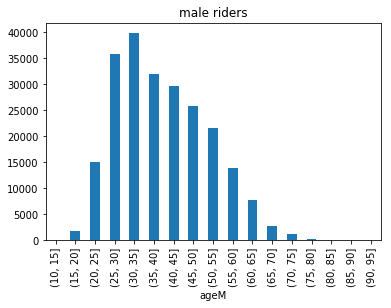

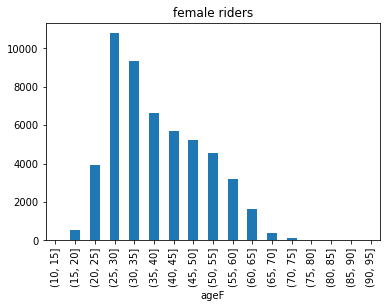

In [11]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders");


**Figure 1: histogrammed distribution of riders' ages by gender **
here is where you should have a nice caption that describes what I am looking at, why I am looking at it, and what I should notice

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]            NaN
(15, 20]       0.001657
(20, 25]       0.010955
(25, 30]       0.060955
(30, 35]       0.065548
(35, 40]       0.052146
(40, 45]       0.031750
(45, 50]       0.018657
(50, 55]       0.011015
(55, 60]       0.010957
(60, 65]       0.008149
(65, 70]       0.003203
(70, 75]       0.000663
(75, 80]       0.000188
(80, 85]       0.000002
(85, 90]            NaN
(90, 95]            NaN


/nfshome/ty1045/.conda/envs/best/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


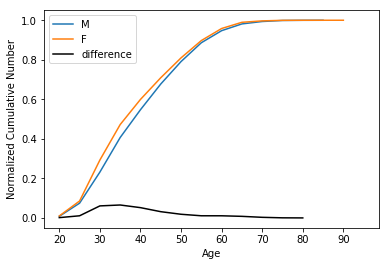

In [12]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' ages by gender** ... [a good caption here]

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [13]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [14]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print(ks)

Ks_2sampResult(statistic=0.0674425578022072, pvalue=4.0408611999082294e-168)


**  FILL IN THE CELL BELOW!**

In [15]:
## your words here!...
## this cell is for you to tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
## to do that refer to the scipy documentation to understand the output of the scipy.stats.ks_2samp function
print(ks.statistic, ks.pvalue)

0.0674425578022072 4.0408611999082294e-168


### Explanation: Basically, ks returns two number. The first one is the statistic and the second one is the pvalue. Because we can see that the p value is smaller than 0.05, usually we can reject the null hypothesis and favor the alternatives.

### Null Hypothesis:
### Distribution of male riders'a age is the same as the distribution of female riders'a age.

### Since the pvalue is almost 0..it is smaller than 0.05. In this case, we could reject the null hypothesis that there is no statistical difference in the age distribution of male and female riders

The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

In [16]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS


df = df[:2000]
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print(ks)


Ks_2sampResult(statistic=0.479, pvalue=2.8295870210147354e-201)


### As we can see that the p value is nearly 0, and 0 < 0.05, we can reject the null hypothesis and conclude that distribution of male riders'a age is not the same as the distribution of female riders'a age.

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



### Null hypothesis: in each age group, there are no correlations between the number of male riders and female riders

In [21]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis

df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

size = min(len(df.ageM), len(df.ageF))
male = np.sort(np.random.choice(df.ageM, size=size))
female = np.sort(np.random.choice(df.ageF, size=size))

pearson = scipy.stats.pearsonr(male,female)

print(pearson)

(0.9953075564320969, 0.0)


### Correlation is 0.995, meaning there is a strong positive correlation between the two factors. Moreover, p-value of 0 < 0.05 means that we can reject our null hypothesis and conclude that there are some correlations between the two.

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [22]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis
spearman = scipy.stats.spearmanr(male, female)

print(spearman)

SpearmanrResult(correlation=0.9987094703241312, pvalue=0.0)


### a correlation of 0.998 again indicating a strong positive correlation. P-value of 0.0 < 0.05 indicating we can reject the null hypothesis and conclude that there are some correlations.

** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**

### Those two correlation factors return two values: 1) correlation factor and 2) p-value. Since p-value is small, we can reject the null hypothesis. Moreover, a 0.90+ correlation factor indicating that there exists some correlations between the two.

# Trip Duration of Bikers that Ride During the Day vs Night

### $H_0$: there are no differences in the ride during the day vs. night of both male riders and female riders.
### $H_a$: there are some differences in the ride during the day vs. night of both male riders and female riders.
### $$ \alpha = 0.05 $$

In [23]:
datestring1 = '201607'
getCitiBikeCSV(datestring1)
datestring2 = '201608'
getCitiBikeCSV(datestring2)

file in place, you can continue
file in place, you can continue


In [26]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring1 + '-citibike-tripdata.csv')
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')

In [28]:
df1['date'] = pd.to_datetime(df1['starttime'])

In [29]:
df2['date'] = pd.to_datetime(df2['starttime'])

In [31]:
data = pd.concat([df1, df2])

In [32]:
data = data[['tripduration','date']]

data_day = data.tripduration[(data.date.dt.hour < 18) & (data.date.dt.hour >= 6)]
data_night = data.tripduration[(data.date.dt.hour >= 18) | (data.date.dt.hour < 6)]

In [34]:
data_day.head(5)

1511     177
1512    1653
1513     686
1514     450
1515     265
Name: tripduration, dtype: int64

In [35]:
data_night.head(5)

0    704
1    492
2    191
3    687
4    609
Name: tripduration, dtype: int64

<Figure size 720x1152 with 0 Axes>

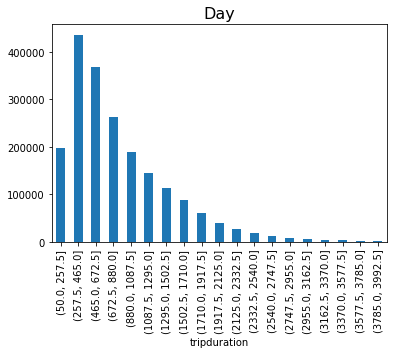

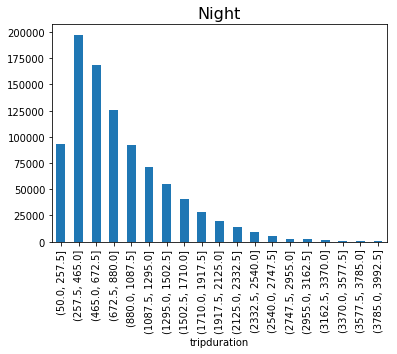

<Figure size 720x1152 with 0 Axes>

In [36]:
# plot the night and day ridership graph
bins = np.arange(50, 4200, (4200 - 50) / 20)
axD = data_day.groupby(pd.cut(data_day,bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)

axD.set_title('Day', fontsize=16)
axN = data_night.groupby(pd.cut(data_night,bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axN.set_title('Night', fontsize=16)

plt.figure(figsize=(10,16))

                  count_nonzero
tripduration                   
(50.0, 257.5]          0.000558
(257.5, 465.0]         0.007599
(465.0, 672.5]         0.012968
(672.5, 880.0]         0.010962
(880.0, 1087.5]        0.006480
(1087.5, 1295.0]       0.003040
(1295.0, 1502.5]       0.001540
(1502.5, 1710.0]       0.001411
(1710.0, 1917.5]       0.001212
(1917.5, 2125.0]       0.000435
(2125.0, 2332.5]       0.000525
(2332.5, 2540.0]       0.000934
(2540.0, 2747.5]       0.001140
(2747.5, 2955.0]       0.000991
(2955.0, 3162.5]       0.000846
(3162.5, 3370.0]       0.000674
(3370.0, 3577.5]       0.000477
(3577.5, 3785.0]       0.000170
(3785.0, 3992.5]       0.000000


/nfshome/ty1045/.conda/envs/best/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


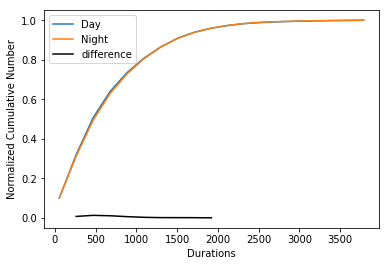

In [38]:
day = data_day.groupby(pd.cut(data_day,bins)).agg([count_nonzero]).cumsum()
night = data_night.groupby(pd.cut(data_night,bins)).agg([count_nonzero]).cumsum()

print (np.abs(day / day.max() - night / night.max()))

pl.plot(bins[:-1] + 5, day / day.max(), label = "Day")
pl.plot(bins[:-1] + 5, night / night.max(), label = "Night")
pl.plot(bins[:-1] + 5, np.sqrt(day / day.max() - night / night.max())**2, 'k-',
        label = "difference")
pl.xlabel("Durations")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

### Figure 2: Cumulative Distribution of CitiBike Bikers' Duration of Day and Night

## Let's do the KS test

### Null Hypothesis: there are no differences in both the day and night ridership duration distributions

In [39]:
ks = scipy.stats.ks_2samp(data_day, data_night)
print(ks)

Ks_2sampResult(statistic=0.011355205327852613, pvalue=6.666008381460048e-72)


### Because p < 0.05, we could reject our null hypothesis and conclude that there are some differences in both the day and night ridership duration distributions

# Now retest using a test for correlation

# Pearson's test for correlation

### Null hypothesis: there are no correlations in the day and night bike ridership duration distribution of both the male riders and the female riders.

In [42]:

size = min(len(data_day), len(data_night))
day = np.sort(np.random.choice(data_day, size=size))
night = np.sort(np.random.choice(data_night, size=size))
pearson = scipy.stats.pearsonr(day,night)

print(pearson)

(0.9560395246725337, 0.0)


### correlation coefficient of 0.981 means a strong positive correlation between the two. Moreover, p-value < 0.05 means we can safely reject our null hypothesis.

# Spearman's test for correlation

### Null hypothesis: there are no correlations in the day and night bike ridership duration distribution of both the male riders and the female riders.

In [44]:
spearman = scipy.stats.spearmanr(day, night)
print(spearman)

SpearmanrResult(correlation=0.9999994882185043, pvalue=0.0)


### Like we have seen above, a correlaton of 0.99 indicating a strong correlation between the two. As p-value is 0.0 < 0.05, we could reject our null hypothesis.